In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bonoloto_results.csv')

In [3]:
df

,FECHA,N1,N2,N3,N4,N5,N6,C,R,Pares/Impares,Decenas,Bajos/Altos,Repiten
0,Dom-28-02-1988,6,8,12,23,24,45,3,0,(4/2),'21201',(5/1),0
1,Lun-29-02-1988,11,31,33,34,41,49,42,0,(1/5),'01032',(1/5),0
2,Mar-1-03-1988,8,20,21,29,48,49,41,0,(3/3),'10302',(3/3),1
3,Mie-2-03-1988,8,24,25,29,36,39,47,0,(3/3),'10320',(3/3),2
4,Dom-6-03-1988,2,5,6,20,29,37,15,0,(3/3),'30210',(4/2),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977,Mar-5-08-2025,6,9,13,21,27,45,2,8,(1/5),'21201',(4/2),0
8978,Mie-6-08-2025,4,9,12,22,33,40,45,4,(4/2),'21111',(4/2),1
8979,Jue-7-08-2025,1,15,26,31,32,38,29,5,(3/3),'11130',(2/4),0
8980,Vie-8-08-2025,9,24,29,35,38,41,39,7,(2/4),'10221',(2/4),1


In [4]:
df[' N1']

0        6
1       11
2        8
3        8
4        2
        ..
8977     6
8978     4
8979     1
8980     9
8981    20
Name:  N1, Length: 8982, dtype: int64

In [5]:
# Limpiar los nombres de las columnas para eliminar espacios en blanco
df.columns = df.columns.str.strip()

# Verificar que los nombres de las columnas se han limpiado correctamente
print(df.columns)

Index(['FECHA', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'C', 'R', 'Pares/Impares',
       'Decenas', 'Bajos/Altos', 'Repiten'],
      dtype='object')


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Suponiendo que df ya está cargado y tiene las columnas necesarias
# Seleccionamos las columnas N1 a N6 como características
X = df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']]

# La variable objetivo será la próxima fila de números
# Para esto, desplazamos los números hacia arriba
y = df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']].shift(-1)

# Eliminamos la última fila que tendrá valores NaN en y
X = X[:-1]
y = y[:-1]

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Hacemos predicciones
predictions = model.predict(X_test)

# Redondeamos las predicciones a enteros
predictions = np.round(predictions).astype(int)

# Evaluamos el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Para predecir los próximos números, puedes usar el último sorteo
next_numbers = model.predict([df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']].iloc[-1]])
next_numbers = np.round(next_numbers).astype(int)  # Redondear y convertir a enteros
print(f'Próximos números predichos: {next_numbers}')

Mean Squared Error: 53.907994806158406
Próximos números predichos: [[ 5 15 20 30 38 44]]


/home/juli/Escritorio/bonoloto_forecast/bonoloto_python/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [7]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Usar MultiOutputRegressor para Gradient Boosting
gb_model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42))
gb_model.fit(X_train, y_train)

# Hacemos predicciones con Gradient Boosting
gb_predictions = gb_model.predict(X_test)
gb_predictions = np.round(gb_predictions).astype(int)

# Evaluamos el modelo de Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f'Mean Squared Error (Gradient Boosting): {gb_mse}')

Mean Squared Error (Gradient Boosting): 50.9844184752365


In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Usar MultiOutputRegressor para Gradient Boosting
gb_model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42))
gb_model.fit(X_train, y_train)

# Hacemos predicciones con Gradient Boosting
gb_predictions = gb_model.predict(X_test)
gb_predictions = np.round(gb_predictions).astype(int)

# Evaluamos el modelo de Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f'Mean Squared Error (Gradient Boosting): {gb_mse}')

Mean Squared Error (Gradient Boosting): 50.9844184752365


In [9]:
# Usar MultiOutputRegressor para K-Nearest Neighbors
knn_model = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=5))
knn_model.fit(X_train, y_train)

# Hacemos predicciones con KNN
knn_predictions = knn_model.predict(X_test)
knn_predictions = np.round(knn_predictions).astype(int)

# Evaluamos el modelo de KNN
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f'Mean Squared Error (KNN): {knn_mse}')

Mean Squared Error (KNN): 62.36032276015583


In [10]:
# Visualización de los resultados
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

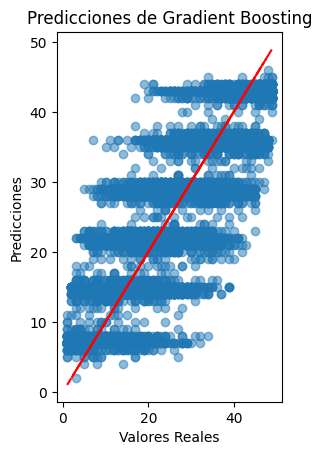

In [12]:
# Gráfico de dispersión para Gradient Boosting
plt.subplot(1, 2, 1)
plt.scatter(y_test.values, gb_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicciones de Gradient Boosting')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

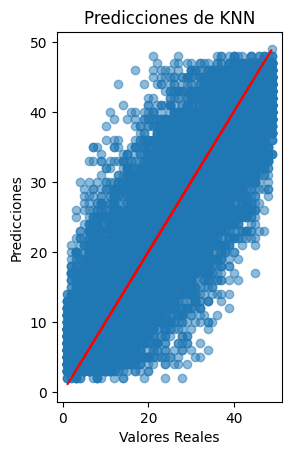

In [13]:
# Gráfico de dispersión para KNN
plt.subplot(1, 2, 2)
plt.scatter(y_test.values, knn_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicciones de KNN')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()
plt.show()

In [14]:
# Para predecir los próximos números con Gradient Boosting
next_numbers_gb = gb_model.predict([df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']].iloc[-1]])
next_numbers_gb = np.round(next_numbers_gb).astype(int)
print(f'Próximos números predichos (Gradient Boosting): {next_numbers_gb}')

Próximos números predichos (Gradient Boosting): [[ 7 14 21 28 36 43]]


/home/juli/Escritorio/bonoloto_forecast/bonoloto_python/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/juli/Escritorio/bonoloto_forecast/bonoloto_python/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/juli/Escritorio/bonoloto_forecast/bonoloto_python/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/juli/Escritorio/bonoloto_forecast/bonoloto_python/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/juli/Escri

In [15]:
# Para predecir los próximos números con KNN
next_numbers_knn = knn_model.predict([df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']].iloc[-1]])
next_numbers_knn = np.round(next_numbers_knn).astype(int)
print(f'Próximos números predichos (KNN): {next_numbers_knn}')

Próximos números predichos (KNN): [[ 7 16 22 33 43 48]]


/home/juli/Escritorio/bonoloto_forecast/bonoloto_python/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/juli/Escritorio/bonoloto_forecast/bonoloto_python/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/juli/Escritorio/bonoloto_forecast/bonoloto_python/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/juli/Escritorio/bonoloto_forecast/bonoloto_python/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/juli/Escritorio/bonoloto_forecast/

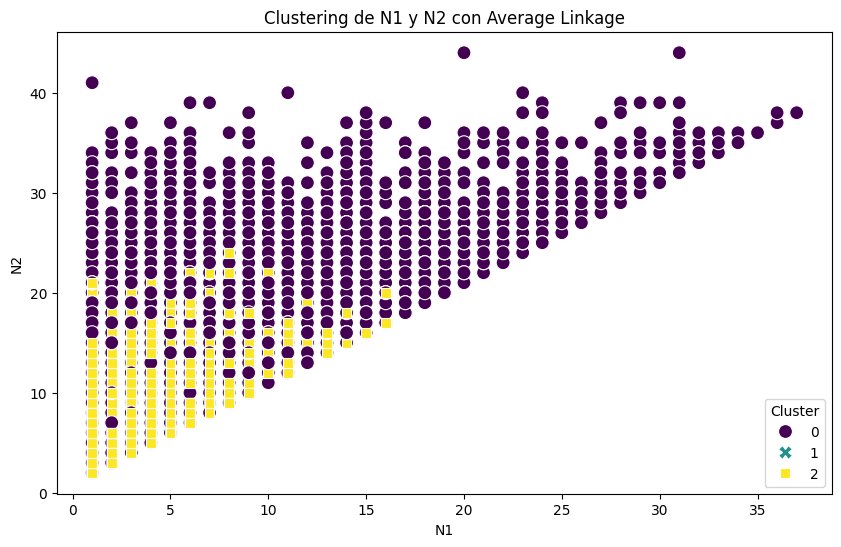

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Supongamos que df es tu DataFrame y ya está definido
# Seleccionamos las columnas N1 a N6
data = df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']]

# Normalizamos los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicamos el clustering aglomerativo con average linkage
clustering = AgglomerativeClustering(n_clusters=3, linkage='average')  # Cambia n_clusters según sea necesario
clusters = clustering.fit_predict(data_scaled)

# Añadimos los resultados de clustering al DataFrame
df['Cluster'] = clusters

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='N1', y='N2', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('Clustering de N1 y N2 con Average Linkage')
plt.xlabel('N1')
plt.ylabel('N2')
plt.legend(title='Cluster')
plt.show()

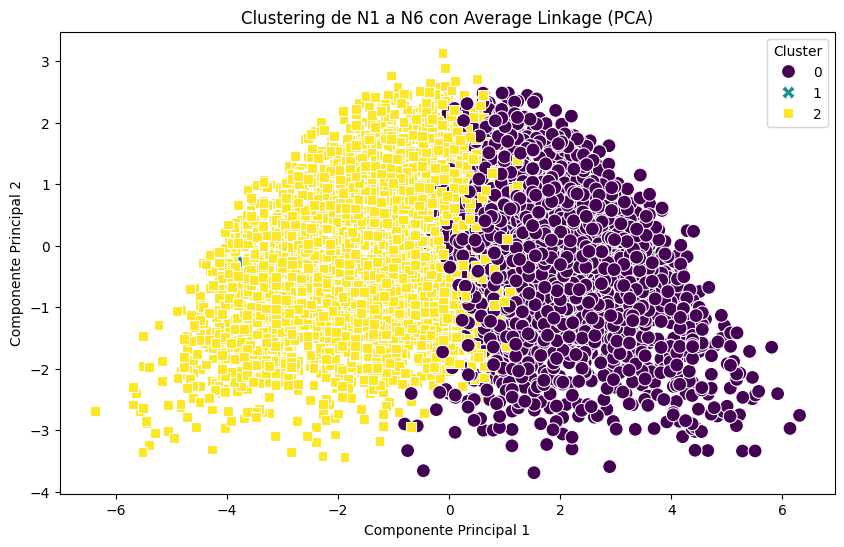

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seleccionamos las columnas N1 a N6
data = df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']]

# Normalizamos los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reducimos la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Aplicamos el clustering aglomerativo con average linkage
clustering = AgglomerativeClustering(n_clusters=3, linkage='average')  # Cambia n_clusters según sea necesario
clusters = clustering.fit_predict(data_scaled)

# Añadimos los resultados de clustering al DataFrame
df['Cluster'] = clusters

# Visualización de los clusters en el espacio reducido
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Cluster'], palette='viridis', style=df['Cluster'], s=100)
plt.title('Clustering de N1 a N6 con Average Linkage (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

<Figure size 1200x800 with 0 Axes>

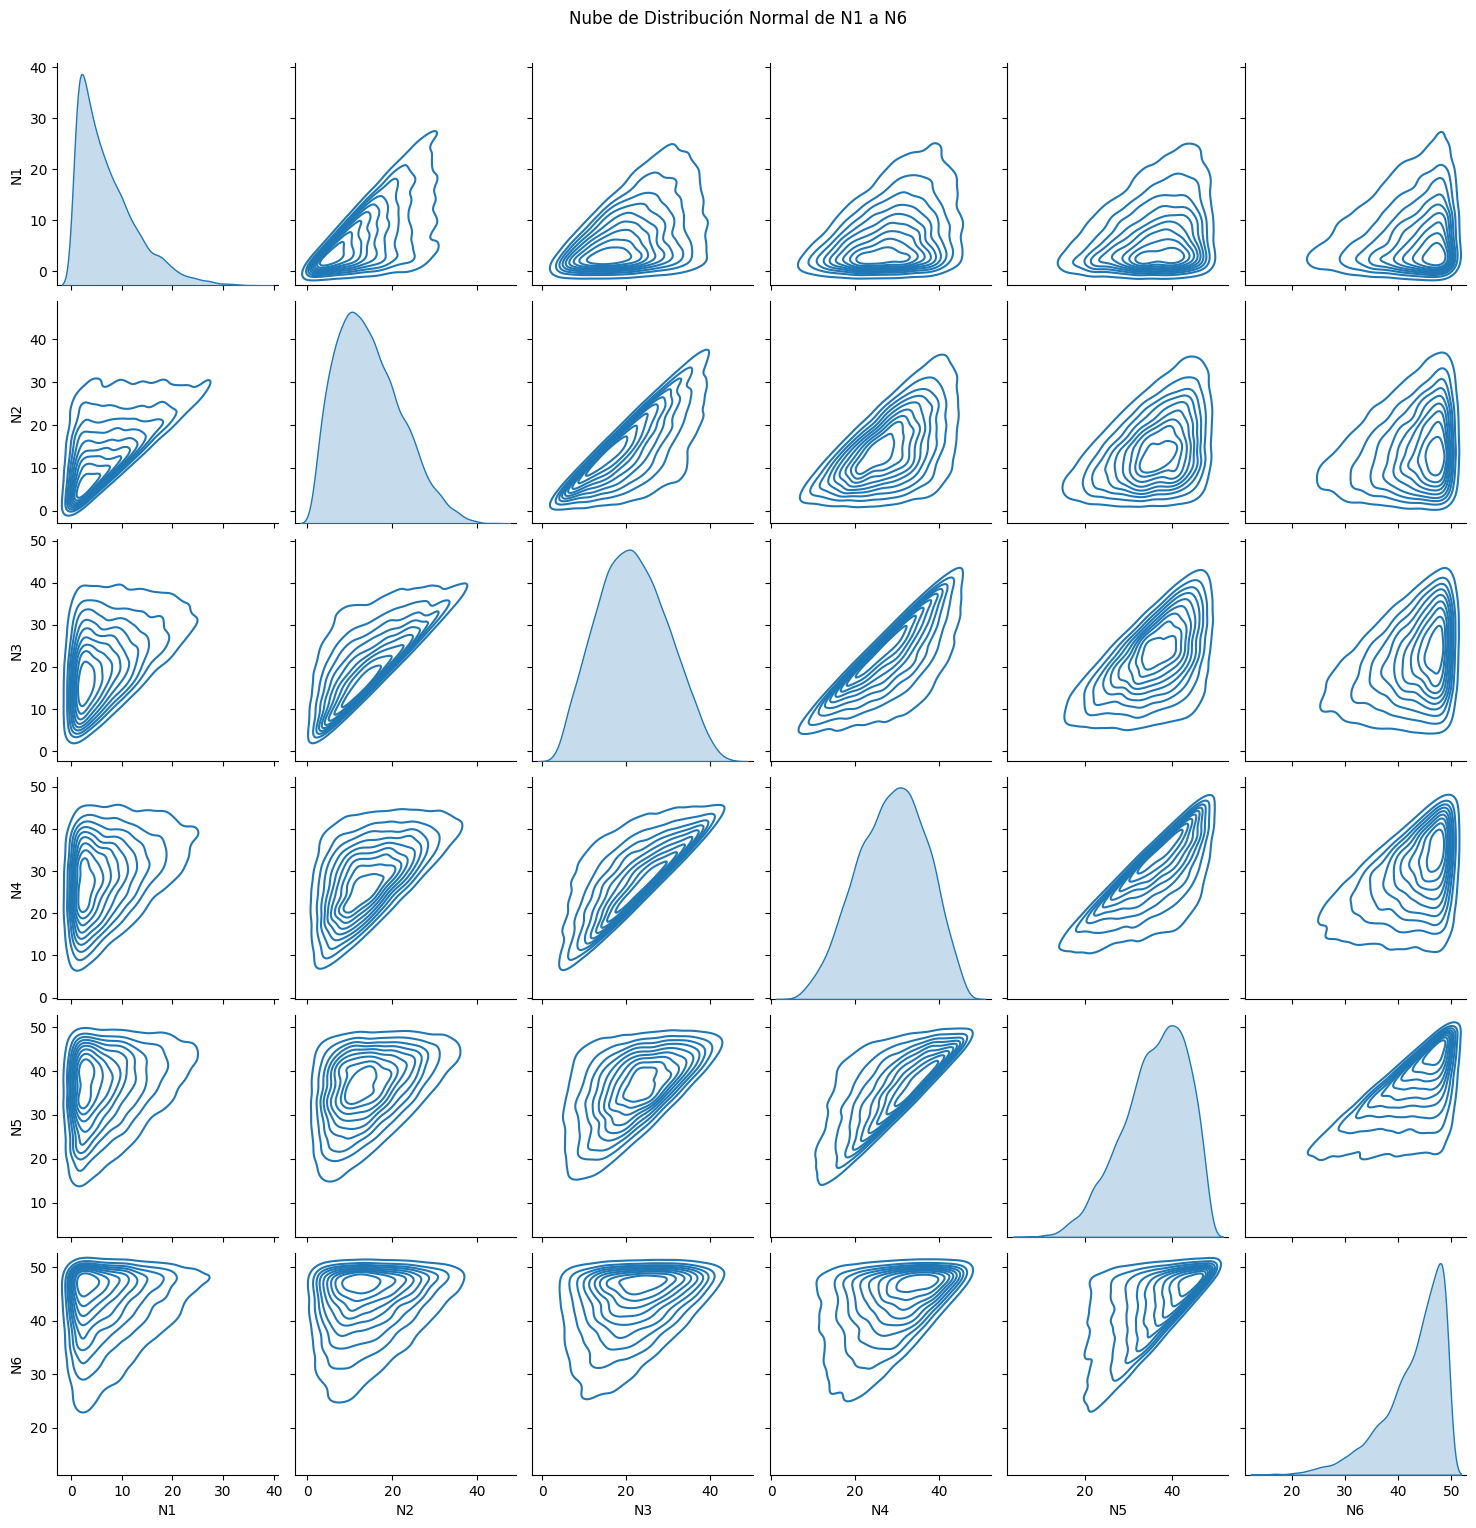

In [18]:
# Seleccionamos las columnas N1 a N6
data = df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']]

# Creamos un gráfico de densidad para visualizar la distribución
plt.figure(figsize=(12, 8))

# Usamos pairplot para ver la distribución de cada par de variables
sns.pairplot(data, kind='kde', diag_kind='kde')

plt.suptitle('Nube de Distribución Normal de N1 a N6', y=1.02)
plt.show()

IndexError: list index out of range

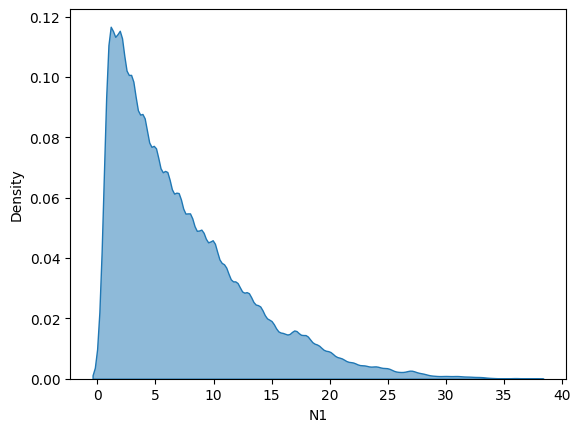

In [19]:
# Seleccionamos las columnas N1 a N6
data = df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']]

# Creamos un nuevo DataFrame con los valores de 1 a 50
x_values = np.linspace(1, 50, 100)
density_data = pd.DataFrame()

# Calculamos la densidad para cada columna y la agregamos al nuevo DataFrame
for column in data.columns:
    density = sns.kdeplot(data[column], bw_adjust=0.5, fill=True, alpha=0.5)
    density_data[column] = density.get_lines()[0].get_data()[1]

# Graficamos la densidad
plt.figure(figsize=(12, 8))
for column in density_data.columns:
    plt.plot(x_values, density_data[column], label=column)

plt.title('Nube de Distribución Normal de N1 a N6 en relación a valores de 1 a 50')
plt.xlabel('Valores (1 a 50)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

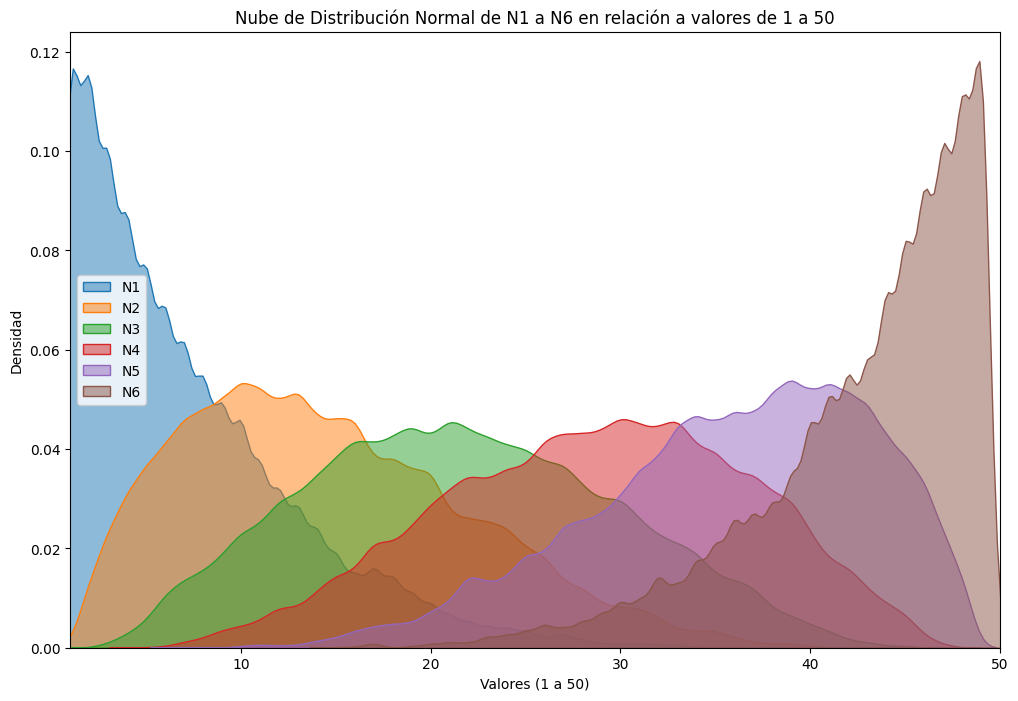

In [20]:
# Seleccionamos las columnas N1 a N6
data = df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']]

# Creamos un gráfico de densidad para visualizar la distribución
plt.figure(figsize=(12, 8))

# Usamos un bucle para graficar la densidad de cada columna
for column in data.columns:
    sns.kdeplot(data[column], bw_adjust=0.5, fill=True, alpha=0.5, label=column)

# Configuramos los ejes
plt.xlim(1, 50)
plt.title('Nube de Distribución Normal de N1 a N6 en relación a valores de 1 a 50')
plt.xlabel('Valores (1 a 50)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [21]:
df.columns

Index(['FECHA', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'C', 'R', 'Pares/Impares',
       'Decenas', 'Bajos/Altos', 'Repiten', 'Cluster'],
      dtype='object')

In [22]:
df['FECHA'].value_counts()

FECHA
Dom-28-02-1988     1
Lun-29-02-1988     1
Mar-1-03-1988      1
Mie-2-03-1988      1
Dom-6-03-1988      1
                  ..
Mar-5-08-2025      1
Mie-6-08-2025      1
Jue-7-08-2025      1
Vie-8-08-2025      1
Sab-9-08-2025      1
Name: count, Length: 8982, dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression

# Creamos un DataFrame vacío para almacenar los pronósticos
forecast_results = pd.DataFrame()

# Definimos el número de observaciones futuras que queremos pronosticar
n_future = 60

# Pronosticamos para cada columna N1 a N6
for column in ['N1', 'N2', 'N3', 'N4', 'N5', 'N6']:
    # Preparamos los datos para el modelo
    X = np.arange(len(df)).reshape(-1, 1)  # Usamos el índice como variable independiente
    y = df[column].values  # Valores de la columna a predecir

    # Creamos y ajustamos el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Creamos un rango para las futuras observaciones
    future_X = np.arange(len(df), len(df) + n_future).reshape(-1, 1)
    
    # Hacemos las predicciones
    future_predictions = model.predict(future_X)
    
    # Almacenamos los resultados en el DataFrame
    forecast_results[column] = future_predictions

# Agregamos las observaciones al DataFrame de resultados
forecast_results['Observación'] = np.arange(len(df), len(df) + n_future)

# Mostramos los resultados
print(forecast_results.tail(60))  # Muestra las últimas 60 observaciones pronosticadas

          N1         N2         N3         N4         N5         N6  \
0   7.193780  14.626204  21.580322  28.798634  35.808061  42.895877   
1   7.193777  14.626225  21.580317  28.798657  35.808055  42.895881   
2   7.193774  14.626247  21.580312  28.798681  35.808049  42.895885   
3   7.193771  14.626269  21.580307  28.798704  35.808042  42.895889   
4   7.193767  14.626291  21.580302  28.798728  35.808036  42.895893   
5   7.193764  14.626313  21.580297  28.798751  35.808030  42.895897   
6   7.193761  14.626334  21.580292  28.798775  35.808023  42.895901   
7   7.193757  14.626356  21.580287  28.798798  35.808017  42.895905   
8   7.193754  14.626378  21.580282  28.798822  35.808011  42.895908   
9   7.193751  14.626400  21.580277  28.798845  35.808004  42.895912   
10  7.193748  14.626422  21.580272  28.798868  35.807998  42.895916   
11  7.193744  14.626443  21.580267  28.798892  35.807992  42.895920   
12  7.193741  14.626465  21.580262  28.798915  35.807985  42.895924   
13  7.

In [27]:
from sklearn.linear_model import LinearRegression


# Creamos un DataFrame vacío para almacenar los pronósticos
forecast_results = pd.DataFrame()

# Definimos el número de observaciones futuras que queremos pronosticar
n_future = 60

# Pronosticamos para cada columna N1 a N6
for column in ['N1', 'N2', 'N3', 'N4', 'N5', 'N6']:
    # Preparamos los datos para el modelo
    X = np.arange(len(df)).reshape(-1, 1)  # Usamos el índice como variable independiente
    y = df[column].values  # Valores de la columna a predecir

    # Creamos y ajustamos el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Creamos un rango para las futuras observaciones
    future_X = np.arange(len(df), len(df) + n_future).reshape(-1, 1)
    
    # Hacemos las predicciones
    future_predictions = model.predict(future_X)
    
    # Agregamos un poco de ruido aleatorio para simular variaciones
    noise = np.random.randint(-5, 5, size=future_predictions.shape)  # Ruido entre -5 y 5
    future_predictions += noise
    
    # Aseguramos que los resultados sean enteros
    future_predictions = np.round(future_predictions).astype(int)
    
    # Almacenamos los resultados en el DataFrame
    forecast_results[column] = future_predictions

# Agregamos las observaciones al DataFrame de resultados
forecast_results['Observación'] = np.arange(len(df), len(df) + n_future)

# Mostramos los resultados
print(forecast_results.tail(60))  # Muestra las últimas 60 observaciones pronosticadas

    N1  N2  N3  N4  N5  N6  Observación
0    6  17  21  25  33  41         8982
1    6  17  18  27  33  43         8983
2    4  13  18  29  39  47         8984
3    3  12  26  27  35  45         8985
4    2  10  20  31  37  42         8986
5   11  12  17  30  36  39         8987
6    6  17  21  30  38  46         8988
7    4  14  24  28  35  46         8989
8   10  19  24  24  32  47         8990
9    4  13  21  28  32  38         8991
10   3  17  23  30  34  47         8992
11   9  12  25  24  31  39         8993
12   9  18  18  29  38  40         8994
13   3  12  25  25  37  47         8995
14   6  10  26  26  31  45         8996
15   6  10  23  33  33  46         8997
16   6  13  21  30  36  43         8998
17   2  18  22  30  32  41         8999
18   6  14  23  32  38  44         9000
19  11  14  23  25  31  38         9001
20   4  19  22  27  33  44         9002
21  10  11  22  29  40  47         9003
22   3  18  22  30  35  39         9004
23   4  13  21  31  31  39         9005


In [28]:
forecast_results

,N1,N2,N3,N4,N5,N6,Observación
0,6,17,21,25,33,41,8982
1,6,17,18,27,33,43,8983
2,4,13,18,29,39,47,8984
3,3,12,26,27,35,45,8985
4,2,10,20,31,37,42,8986
5,11,12,17,30,36,39,8987
6,6,17,21,30,38,46,8988
7,4,14,24,28,35,46,8989
8,10,19,24,24,32,47,8990
9,4,13,21,28,32,38,8991


In [32]:
import openpyxl

forecast_results.to_excel('bonoloto_pronosticos.xlsx', index=False)